In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
#Making best add for custumer to take 
df=pd.read_csv('ads CTR optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
#Created 10 ads with different design to amek the ad for best suv
#we create simulations of adss one by one
#Its simiulation and its necessary for UCB
#which is best round


# Impleementing UCB

In [13]:
N=10000
d=10
ads_selected=[]
numbers_of_selections=[0]*d
sums_of_rewards=[0]*d
total_rewards=0
for n in range(0,N):
    #Select an add with maximum upper confidencce bounds
    ad=0
    max_upperbound=0
    for i in range(0,d):
        if numbers_of_selections[i]>0:
            average_reward=sums_of_rewards[i]/numbers_of_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upperbound:
            max_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad]=numbers_of_selections[ad]+1
    reward=df.values[n,ad]
    sums_of_rewards[ad]=sums_of_rewards[ad]+reward
    total_rewards=total_rewards+reward


In [11]:
N=10000
d=10
ads_selected=[]
numbers_of_selections=[0]*d
sums_of_rewards=[0]*d
total_rewards=0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_rewards = total_rewards + reward


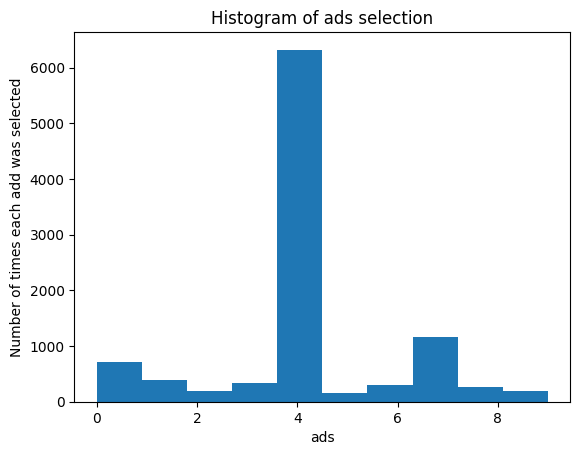

In [12]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('ads')
plt.ylabel('Number of times each add was selected')
plt.show()

In [ ]:
#Add 4 is most selection
#Try it on 5000 it was able to do it as we need to do in minimum time